In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import utilities as u
%matplotlib inline

#importing Data

data=pd.read_csv("listings.csv")

#Getting Columns






#Temp_data=data[(list(data.describe().columns)).append(['price','weekly_price','monthly_price','security_deposit','cleaning_fee','Review_diff','host_response_rate'
#                  ,'extra_people'])]



In [2]:
column=data.columns

# Some of the is getting as blank however it is float so changing the datatype accordingly

#removing special char from the data.
data[column]=data[column].replace({'\$':''}, regex = True)


data[column]=data[column].replace({'\%':''}, regex = True)


data =data.dropna(how='all',axis=0)

# filtering columns based on the float and int type.

Temp_data=data[list(data.describe().columns)]


#Temp_data
Temp_data


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,...,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,8,0.30
3814,8902327,20160104002432,46566046,1.0,1.0,47.649552,-122.318309,4,1.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1,2.00
3815,10267360,20160104002432,52791370,1.0,1.0,47.508453,-122.240607,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3816,9604740,20160104002432,25522052,1.0,1.0,47.632335,-122.275530,2,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [3]:
#Taking date diff from the review date.

date_Format=['first_review','last_review']

data[date_Format] = data[date_Format].apply(pd.to_datetime)

data['Review_diff'] =(data[date_Format[1]]-data[date_Format[0]])/np.timedelta64(1, 's')




#data['Review_diff'] = data[date_Format[1]-date_Format[0]]

#Taking the additional comlumns in float and int.

columns_to_float=list(data.describe().columns) + ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','Review_diff','host_response_rate'
                  ,'extra_people']
data[columns_to_float]=data[columns_to_float].replace({',':''}, regex = True)

data[columns_to_float]=data[columns_to_float].replace({' ':''}, regex = True)
data[columns_to_float] = data[columns_to_float].astype(float)



# Splitting the data Based on the float, int and objects
DF_flin=data.select_dtypes('float','int')
DF_cat=data.select_dtypes('object')

DF_flin=DF_flin.dropna(how='all',axis=1)


#type(data[date_Format].apply(pd.to_datetime))

#DF_flin['host_response_rate']

#Temp_data['price','weekly_price','monthly_price','security_deposit','cleaning_fee','Review_diff','host_response_rate'
#                  ,'extra_people']

DF_flin=DF_flin.drop(['id','host_id','scrape_id'],axis=1)

In [4]:
#checking dependency on different variable.
DF_flin= DF_flin.dropna(how='all',axis=1)
(DF_flin.corr())

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,Review_diff
host_response_rate,1.000000,0.022147,0.022147,-0.021388,-0.012355,0.005433,0.008252,-0.004668,0.015823,0.024440,...,0.156567,0.130925,0.170897,0.148516,0.155346,0.070827,0.149482,-0.087481,0.171140,0.041928
host_listings_count,0.022147,1.000000,1.000000,-0.012511,-0.000055,0.111210,0.068226,0.065931,0.085490,-0.020224,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,0.224222,-0.117272,0.004098
host_total_listings_count,0.022147,1.000000,1.000000,-0.012511,-0.000055,0.111210,0.068226,0.065931,0.085490,-0.020224,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,0.224222,-0.117272,0.004098
latitude,-0.021388,-0.012511,-0.012511,1.000000,-0.155092,0.000335,-0.015003,0.039100,0.023000,-0.048056,...,-0.038086,-0.015072,-0.038183,-0.018381,-0.025117,0.096746,-0.019488,0.026750,-0.084988,0.003566
longitude,-0.012355,-0.000055,-0.000055,-0.155092,1.000000,-0.071584,-0.017041,-0.055045,-0.067682,-0.107369,...,-0.047121,-0.037005,-0.062576,-0.046990,-0.061539,-0.190567,-0.043979,0.086343,0.002583,-0.016018
accommodates,0.005433,0.111210,0.111210,0.000335,-0.071584,1.000000,0.538439,0.770974,0.861119,0.439057,...,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,-0.029525,-0.144150,0.024284
bathrooms,0.008252,0.068226,0.068226,-0.015003,-0.017041,0.538439,1.000000,0.610937,0.532838,0.381094,...,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,-0.002731,-0.167894,0.010602
bedrooms,-0.004668,0.065931,0.065931,0.039100,-0.055045,0.770974,0.610937,1.000000,0.753167,0.448786,...,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,-0.045543,-0.230287,0.010920
beds,0.015823,0.085490,0.085490,0.023000,-0.067682,0.861119,0.532838,0.753167,1.000000,0.312155,...,-0.000720,-0.052767,0.004732,-0.021963,-0.013373,-0.023734,-0.029102,0.010536,-0.149079,0.010943
square_feet,0.024440,-0.020224,-0.020224,-0.048056,-0.107369,0.439057,0.381094,0.448786,0.312155,1.000000,...,0.143793,-0.024656,0.063302,0.052781,-0.021799,0.139595,0.005546,0.112333,-0.176298,-0.081543


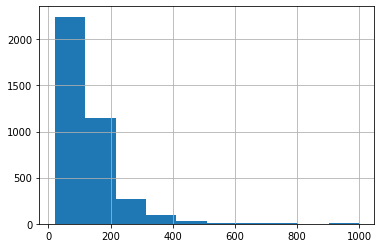

In [5]:

#checking Price distribution
DF_flin['price'].hist()

In [6]:
Range=u.Get_Range_of_Normally_Distributed_data(DF_flin,'price')

Range

(-48.913877904808615, 304.8662089681926)

In [7]:
DF_cat_New=DF_cat.dropna(how='all',axis=1)

In [8]:
DF_cat_New=DF_cat_New[['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','requires_license','instant_bookable',
                       'cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','property_type']]

In [9]:
COL=DF_flin.columns

DF_New = u.fillna(DF_flin, COL)

In [10]:

new_dataFrame= pd.concat((DF_cat_New,DF_New),axis=1)

In [11]:
dropping_list=['listing_url','last_scraped','name','summary','space','description','neighborhood_overview','notes','transit'
            ,'calendar_last_scraped','jurisdiction_names','thumbnail_url','medium_url','picture_url','host_url','host_name'
            ,'host_since','host_about','xl_picture_url','host_thumbnail_url','host_picture_url','host_neighbourhood'
           ,'host_verifications','amenities','street','host_acceptance_rate']

new_dataFrame= pd.concat((DF_cat_New,DF_New),axis=1)

DF_cat_New=DF_cat[['host_is_superhost','host_has_profile_pic','host_identity_verified',
                   'has_availability','requires_license','instant_bookable',
                    'cancellation_policy','require_guest_profile_picture',
                   'require_guest_phone_verification','property_type']] 

new_dataFrame= pd.concat((DF_cat_New,DF_New),axis=1)
    
X, y, test_score, train_score, lm_model, X_train, X_test, y_train, y_test=u.clean_fit_linear_mod(new_dataFrame,'price',dropping_list)

print(test_score)
print(train_score)

0.634620289648466
0.6315717331989397


In [12]:
df_t=u.splitting_amenities_to_columns(DF_cat,'amenities')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_t

,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,...,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer,no_of_amenities
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,10
1,True,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,16
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,21
3,False,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,14
4,True,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,True,True,True,True,True,True,True,True,True,True,...,False,True,False,False,False,False,False,False,False,16
3814,True,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,17
3815,False,True,False,True,False,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,20
3816,True,False,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,11


In [14]:
new_dataFrame= pd.concat((DF_cat_New,DF_New,df_t),axis=1)
    
X, y, test_score, train_score, lm_model, X_train, X_test, y_train, y_test=u.clean_fit_linear_mod(new_dataFrame,'price',dropping_list)

print(test_score)
print(train_score)

0.6380674423920962
0.6428576266362521


In [15]:
Data_Frame = u.mean_bar(df_t,'price',True,new_dataFrame)

[Text(0, 0.5, 'count'), Text(0.5, 0, 'No. of amenities')]

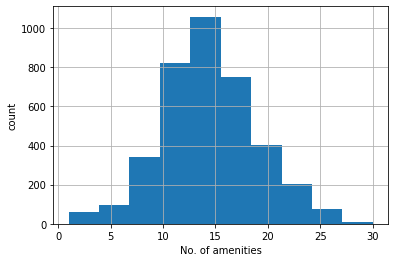

In [21]:
new_dataFrame['no_of_amenities'].hist().set(xlabel='No. of amenities',ylabel='count')

In [20]:
X=u.Get_Range_of_Normally_Distributed_data(new_dataFrame, 'no_of_amenities')
X

(5.145236140923501, 23.59598963173234)

price
security_deposit
cleaning_fee


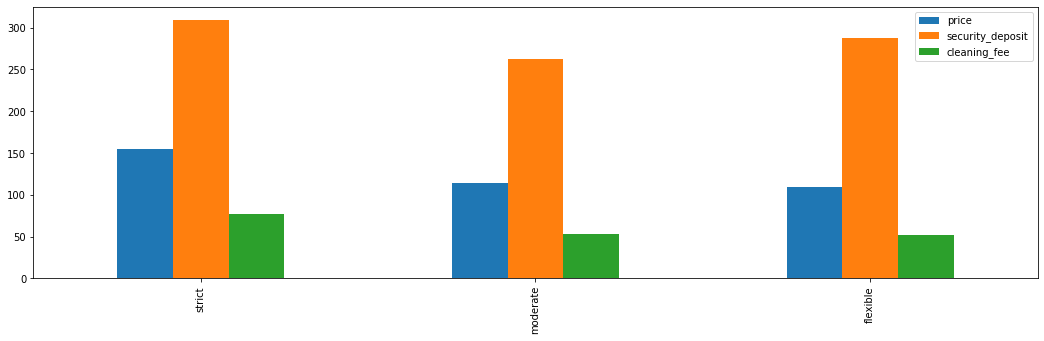

In [19]:

compared_list = ['price','security_deposit','cleaning_fee']
strict_list=[]
moderate_list=[]
flexible_list=[]
for i in compared_list:
    print(i)
    strict_list.append(new_dataFrame[new_dataFrame['cancellation_policy']=='strict'][i].mean()),
    moderate_list.append(new_dataFrame[new_dataFrame['cancellation_policy']=='moderate'][i].mean()),
    flexible_list.append(new_dataFrame[new_dataFrame['cancellation_policy']=='flexible'][i].mean())
    
    
    
plotdata = pd.DataFrame({
        'strict': strict_list,
        'moderate':moderate_list,
        'flexible':flexible_list},index = compared_list )
                       


plotdata.T.plot(kind='bar',figsize=(18,5))

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Property_type/Cancellation_policy')]

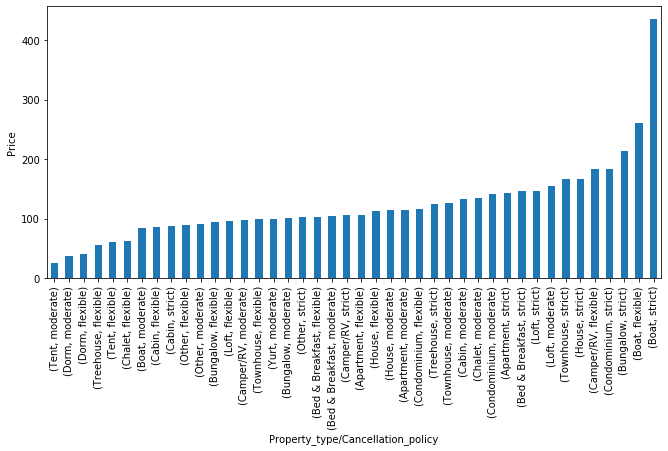

In [23]:
new_dataFrame[['property_type','price','cancellation_policy']].groupby(['property_type','cancellation_policy'])['price'].mean().sort_values(ascending=True).plot(kind='bar',figsize=(11,5)).set(xlabel='Property_type/Cancellation_policy',ylabel='Price')

[Text(0, 0.5, '% having Amenities'), Text(0.5, 0, 'Types of Amenities')]

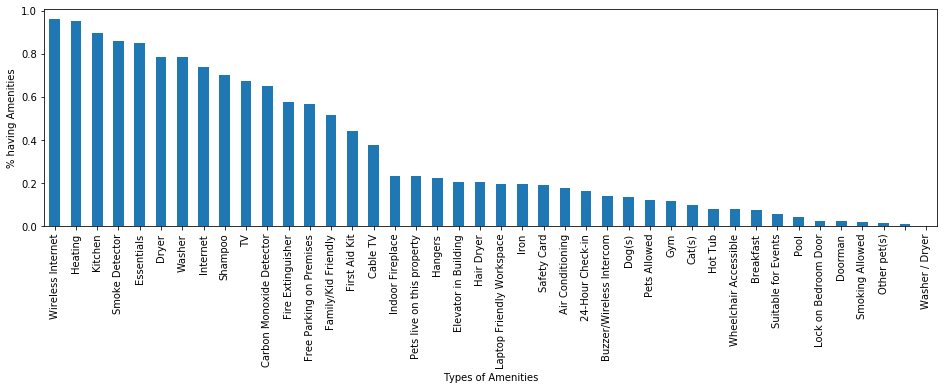

In [24]:
 df_t.drop(['no_of_amenities'],axis=1).mean(axis=0).sort_values(ascending=False).plot(kind='bar',figsize=(16,4)).set(xlabel='Types of Amenities',ylabel="% having Amenities")

In [25]:
ana_DF=pd.DataFrame()

True_dict={}
False_dict={}


for i in list(df_t.drop(['no_of_amenities'],axis=1).columns):
#    print(i)

    True_dict[i]=float(new_dataFrame[new_dataFrame[i]==True].groupby(by=[i]).mean()['price'])
    False_dict[i]=float(new_dataFrame[new_dataFrame[i]==False].groupby(by=[i]).mean()['price'])

In [26]:
ana_DF=pd.DataFrame()

ana_DF=ana_DF.append(False_dict, ignore_index=True)
ana_DF=ana_DF.append(True_dict, ignore_index=True)
ana_DF=ana_DF.T

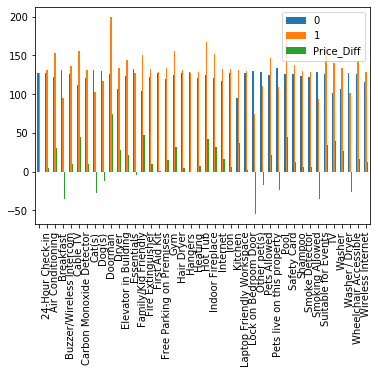

In [27]:
ana_DF['Price_Diff']=ana_DF[1]-ana_DF[0]
ana_DF.plot(kind='bar')

[Text(0, 0.5, 'Difference in Price'), Text(0.5, 0, 'Amenities')]

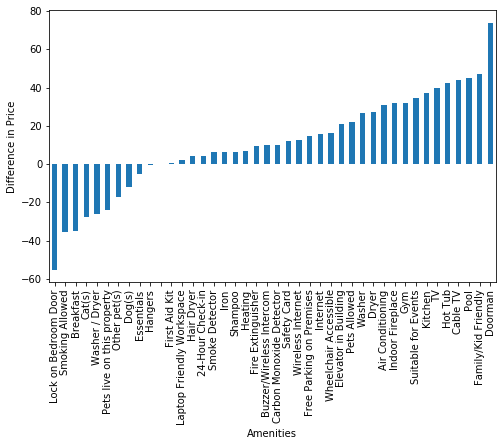

In [28]:
ana_DF['Price_Diff'].sort_values(ascending=True).plot(kind='bar',figsize=(8,5)).set(xlabel='Amenities',ylabel='Difference in Price')

In [31]:
pwd


'C:\\Users\\rishuucool'